In [52]:
import numpy as np
import pandas as pd
import torch

In [2]:
df = pd.read_csv('dataset/salesdaily.csv', parse_dates=['datum'])
df.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
0,2014-01-02,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday
1,2014-01-03,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday
2,2014-01-04,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday
3,2014-01-05,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday
4,2014-01-06,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday


In [3]:
df['Hour'].unique()

array([248, 276, 190])

In [4]:
df['Day'] = df['datum'].dt.day

In [5]:
df.columns

Index(['datum', 'M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03',
       'R06', 'Year', 'Month', 'Hour', 'Weekday Name', 'Day'],
      dtype='object')

In [6]:
# df.drop(columns='Hour', inplace=True)

In [7]:
melted_df = pd.melt(df, id_vars=['datum', 'Year', 'Month', 'Weekday Name', 'Day', 'Hour'], 
                    var_name='drug', value_name='sales')

In [8]:
melted_df.rename(columns={'datum':'DateTime'}, inplace=True)


In [9]:
melted_df.head()

,DateTime,Year,Month,Weekday Name,Day,Hour,drug,sales
0,2014-01-02,2014,1,Thursday,2,248,M01AB,0.0
1,2014-01-03,2014,1,Friday,3,276,M01AB,8.0
2,2014-01-04,2014,1,Saturday,4,276,M01AB,2.0
3,2014-01-05,2014,1,Sunday,5,276,M01AB,4.0
4,2014-01-06,2014,1,Monday,6,276,M01AB,5.0


In [10]:
melted_df.groupby('drug')['sales'].describe()

,count,mean,std,min,25%,50%,75%,max
drug,,,,,,,,
M01AB,2106.0,5.033683,2.737579,0.0,3.00,4.99,6.670,17.340000
M01AE,2106.0,3.895830,2.133337,0.0,2.34,3.67,5.138,14.463000
N02BA,2106.0,3.880441,2.384010,0.0,2.00,3.50,5.200,16.000000
N02BE,2106.0,29.917095,15.590966,0.0,19.00,26.90,38.300,161.000000
N05B,2106.0,8.853627,5.605605,0.0,5.00,8.00,12.000,54.833333
N05C,2106.0,0.593522,1.092988,0.0,0.00,0.00,1.000,9.000000
R03,2106.0,5.512262,6.428736,0.0,1.00,4.00,8.000,45.000000
R06,2106.0,2.900198,2.415816,0.0,1.00,2.00,4.000,15.000000


In [11]:
melted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16848 entries, 0 to 16847
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DateTime      16848 non-null  datetime64[ns]
 1   Year          16848 non-null  int64         
 2   Month         16848 non-null  int64         
 3   Weekday Name  16848 non-null  object        
 4   Day           16848 non-null  int32         
 5   Hour          16848 non-null  int64         
 6   drug          16848 non-null  object        
 7   sales         16848 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int32(1), int64(3), object(2)
memory usage: 987.3+ KB


In [12]:
melted_df['DateTime'].min(), melted_df['DateTime'].max()

(Timestamp('2014-01-02 00:00:00'), Timestamp('2019-10-08 00:00:00'))

In [13]:
melted_df['time_indx'] = (melted_df['DateTime'] - melted_df['DateTime'].min()).dt.days

In [14]:
melted_df.head()

,DateTime,Year,Month,Weekday Name,Day,Hour,drug,sales,time_indx
0,2014-01-02,2014,1,Thursday,2,248,M01AB,0.0,0
1,2014-01-03,2014,1,Friday,3,276,M01AB,8.0,1
2,2014-01-04,2014,1,Saturday,4,276,M01AB,2.0,2
3,2014-01-05,2014,1,Sunday,5,276,M01AB,4.0,3
4,2014-01-06,2014,1,Monday,6,276,M01AB,5.0,4


In [15]:
# Create a set of all expected 'time_idx' values from 0 to the maximum value
expected_time_index = set(range(melted_df['time_indx'].max() + 1)) 
# Convert 'time_idx' column to a set
actual_time_index = set(melted_df['time_indx'])
# Find the missing values in 'time_idx' range
missing_time_idx = expected_time_index - actual_time_index
print(missing_time_idx)

set()


In [16]:
## year, month, weekday, day, and hour are categorical features so let's chaneg the datatype of these columns to object
melted_df['Year'] = melted_df['Year'].astype(str)
melted_df['Month'] = melted_df['Month'].astype(str)
melted_df['Weekday Name'] = melted_df['Weekday Name'].astype(str)
melted_df['Day'] = melted_df['Day'].astype(str)
melted_df['Hour'] = melted_df['Hour'].astype(str)

In [17]:
melted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16848 entries, 0 to 16847
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DateTime      16848 non-null  datetime64[ns]
 1   Year          16848 non-null  object        
 2   Month         16848 non-null  object        
 3   Weekday Name  16848 non-null  object        
 4   Day           16848 non-null  object        
 5   Hour          16848 non-null  object        
 6   drug          16848 non-null  object        
 7   sales         16848 non-null  float64       
 8   time_indx     16848 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 1.2+ MB


In [18]:
df = melted_df
df.reset_index(inplace=True)
df.head()

,index,DateTime,Year,Month,Weekday Name,Day,Hour,drug,sales,time_indx
0,0,2014-01-02,2014,1,Thursday,2,248,M01AB,0.0,0
1,1,2014-01-03,2014,1,Friday,3,276,M01AB,8.0,1
2,2,2014-01-04,2014,1,Saturday,4,276,M01AB,2.0,2
3,3,2014-01-05,2014,1,Sunday,5,276,M01AB,4.0,3
4,4,2014-01-06,2014,1,Monday,6,276,M01AB,5.0,4


In [43]:
from pytorch_forecasting import TimeSeriesDataSet, Baseline, TemporalFusionTransformer
from pytorch_forecasting.data import GroupNormalizer
from pytorch_forecasting.metrics import MAE, MAPE, RMSE, SMAPE, PoissonLoss, QuantileLoss


from tqdm.autonotebook import tqdm
import warnings

warnings.filterwarnings("ignore") 


In [20]:
max_prediction_length = 7
max_encoder_length = 28
training_cutoff = df['DateTime'].max() - pd.DateOffset(days=max_prediction_length)

In [21]:
training_cutoff

Timestamp('2019-10-01 00:00:00')

In [22]:
df[lambda x: x.DateTime <= training_cutoff]

,index,DateTime,Year,Month,Weekday Name,Day,Hour,drug,sales,time_indx
0,0,2014-01-02,2014,1,Thursday,2,248,M01AB,0.0,0
1,1,2014-01-03,2014,1,Friday,3,276,M01AB,8.0,1
2,2,2014-01-04,2014,1,Saturday,4,276,M01AB,2.0,2
3,3,2014-01-05,2014,1,Sunday,5,276,M01AB,4.0,3
4,4,2014-01-06,2014,1,Monday,6,276,M01AB,5.0,4
...,...,...,...,...,...,...,...,...,...,...
16836,16836,2019-09-27,2019,9,Friday,27,276,R06,4.0,2094
16837,16837,2019-09-28,2019,9,Saturday,28,276,R06,3.0,2095
16838,16838,2019-09-29,2019,9,Sunday,29,276,R06,2.1,2096
16839,16839,2019-09-30,2019,9,Monday,30,276,R06,2.0,2097


In [23]:
df.shape[0] - 16792

56

In [26]:
dataset = TimeSeriesDataSet(
    df[lambda x: x.DateTime <= training_cutoff],
    time_idx="time_indx",
    target="sales",
    group_ids=['drug'],
    min_encoder_length=max_encoder_length,  # keep encoder length long (as it is in the validation set)
    max_encoder_length=max_encoder_length,
    min_prediction_length=max_prediction_length,
    max_prediction_length=max_prediction_length,
    time_varying_known_categoricals=["Year", "Month", 'Weekday Name', 'Day'],
    time_varying_known_reals=['time_indx'],
    # time_varying_unknown_categoricals=[],
    time_varying_unknown_reals=['sales'],
    # add_relative_time_idx=True,
    # add_target_scales=True,
    # add_encoder_length=True,
    # allow_missing_timesteps = True
)

In [27]:
# create validation set (predict=True) which means to predict the last max_prediction_length points in time
# for each series
validation = TimeSeriesDataSet.from_dataset(dataset, df, predict=True, stop_randomization=True)


In [28]:
# create dataloaders for model
batch_size = 32  # set this between 32 to 128
train_dataloader = dataset.to_dataloader(train=True, batch_size=batch_size, num_workers=0)
val_dataloader = validation.to_dataloader(train=False, batch_size=batch_size * 10, num_workers=0)

### Create a Baseline Model

In [29]:
# calculate baseline mean absolute error, i.e. predict next value as the last available value from thehistory
baseline_predictions = Baseline().predict(val_dataloader, return_y=True)
MAE()(baseline_predictions.output, baseline_predictions.y)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


tensor(6.2379)

In [30]:
baseline_predictions.output

tensor([[11.3400, 11.3400, 11.3400, 11.3400, 11.3400, 11.3400, 11.3400],
        [ 2.4060,  2.4060,  2.4060,  2.4060,  2.4060,  2.4060,  2.4060],
        [ 0.1000,  0.1000,  0.1000,  0.1000,  0.1000,  0.1000,  0.1000],
        [47.0000, 47.0000, 47.0000, 47.0000, 47.0000, 47.0000, 47.0000],
        [15.0000, 15.0000, 15.0000, 15.0000, 15.0000, 15.0000, 15.0000],
        [ 4.0000,  4.0000,  4.0000,  4.0000,  4.0000,  4.0000,  4.0000],
        [17.0000, 17.0000, 17.0000, 17.0000, 17.0000, 17.0000, 17.0000],
        [ 1.5000,  1.5000,  1.5000,  1.5000,  1.5000,  1.5000,  1.5000]])

In [31]:
baseline_predictions.y

(tensor([[ 5.1800,  5.0000,  7.3400,  3.8400,  4.0000,  7.3400,  0.3300],
         [ 3.2740,  3.0000,  5.6830,  5.0100, 11.6900,  4.5070,  1.7300],
         [ 2.8000,  4.0000,  2.2500,  6.0000,  2.0000,  3.0000,  0.5000],
         [30.2000, 40.4000, 22.4500, 25.4000, 34.6000, 50.8000, 44.3000],
         [ 9.0000, 10.0000, 13.0000,  7.0000,  6.0000,  6.0000, 20.0000],
         [ 1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  2.0000],
         [ 0.0000,  2.0000,  1.0000,  0.0000,  5.0000, 10.0000,  2.0000],
         [ 1.1000,  2.0000,  1.0000,  0.3300,  4.2000,  1.0000,  0.0000]]),
 None)

In [32]:
val_dataloader

### Train the Temporal Fusion Transformer

In [34]:

import lightning.pytorch as pl
from lightning.pytorch.callbacks import EarlyStopping, LearningRateMonitor


In [35]:
# configure network and trainer
pl.seed_everything(42)
trainer = pl.Trainer(
    accelerator="cpu",
    # clipping gradients is a hyperparameter and important to prevent divergance
    # of the gradient for recurrent neural networks
    gradient_clip_val=0.1,
)


tft = TemporalFusionTransformer.from_dataset(
    dataset,
    # not meaningful for finding the learning rate but otherwise very important
    learning_rate=0.000001,
    hidden_size=8,  # most important hyperparameter apart from learning rate
    # number of attention heads. Set to up to 4 for large datasets
    attention_head_size=1,
    dropout=0.1,  # between 0.1 and 0.3 are good values
    hidden_continuous_size=8,  # set to <= hidden_size
    loss=QuantileLoss(),
    optimizer="Ranger"
    # reduce learning rate if no improvement in validation loss after x epochs
    # reduce_on_plateau_patience=1000,
)
print(f"Number of parameters in network: {tft.size()/1e3:.1f}k")

Global seed set to 42
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Number of parameters in network: 6.1k


Finding best initial lr:  26%|██▌       | 26/100 [00:01<00:06, 12.31it/s]

Finding best initial lr: 100%|██████████| 100/100 [00:07<00:00, 13.55it/s]
Learning rate set to 0.12882495516931336
Restoring states from the checkpoint path at /home/fm-pc-lt-281/projects/Pharmaceutical Forecasting/.lr_find_60143b6f-f44f-4c9c-aebf-69a93482a814.ckpt
Restored all states from the checkpoint at /home/fm-pc-lt-281/projects/Pharmaceutical Forecasting/.lr_find_60143b6f-f44f-4c9c-aebf-69a93482a814.ckpt


suggested learning rate: 0.12882495516931336


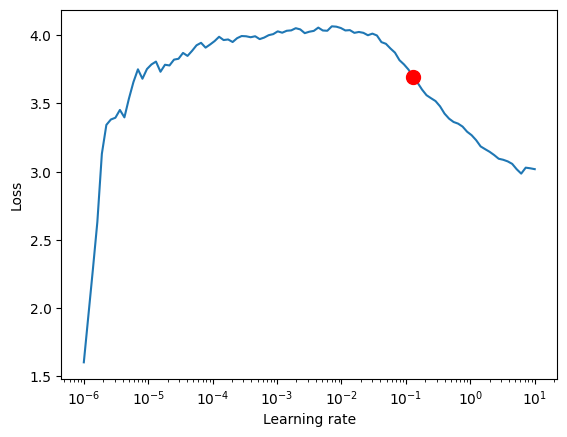

In [ ]:
# find optimal learning rate
from lightning.pytorch.tuner import Tuner

res = Tuner(trainer).lr_find(
    tft,
    train_dataloaders=train_dataloader,
    val_dataloaders=val_dataloader,
    max_lr=10.0,
    min_lr=1e-6,
)

print(f"suggested learning rate: {res.suggestion()}")
fig = res.plot(show=True, suggest=True)
fig.show()

In [36]:
from lightning.pytorch.loggers import TensorBoardLogger
from lightning.pytorch.callbacks import ModelCheckpoint

import pytorch_lightning

In [45]:
# configure network and trainer
early_stop_callback = EarlyStopping(monitor="val_loss", min_delta=1e-4, patience=10, verbose=False, mode="min")
lr_logger = LearningRateMonitor()  # log the learning rate
logger = TensorBoardLogger("lightning_logs_1")  # logging results to a tensorboard


# save the best and the last model periodically by monitoring the val_loss
checkpoint_callback = ModelCheckpoint(
     monitor='val_loss',
     mode='min',
     dirpath='model_saved/',
     filename='tft-{epoch:02d}-{val_loss:.2f}',
     save_last=True, 
     save_top_k=1
 )


# setup pytorch lightning trainer which handles the training process
trainer = pl.Trainer(
    max_epochs=250,
    accelerator="cpu",
    enable_model_summary=True,
    gradient_clip_val=0.1,
    limit_train_batches=32,  # coment in for training, running valiation every 30 batches
    # fast_dev_run=True,  # comment in to check that networkor dataset has no serious bugs
    callbacks=[lr_logger, checkpoint_callback],
    logger=logger,
)

# set up tft model using the given dataset
tft = TemporalFusionTransformer.from_dataset(
    dataset,
    learning_rate=0.01,
    hidden_size=16,
    attention_head_size=2,
    dropout=0.1,
    hidden_continuous_size=8,
    loss=QuantileLoss(),
    log_interval=10,  # uncomment for learning rate finder and otherwise, e.g. to 10 for logging every 10 batches
    optimizer="Ranger",
    reduce_on_plateau_patience=4,
)
print(f"Number of parameters in network: {tft.size()/1e3:.1f}k")

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Number of parameters in network: 17.3k


In [46]:
# fit network (model training)
trainer.fit(
    tft,
    train_dataloaders=train_dataloader,
    val_dataloaders=val_dataloader,
)


   | Name                               | Type                            | Params
----------------------------------------------------------------------------------------
0  | loss                               | QuantileLoss                    | 0     
1  | logging_metrics                    | ModuleList                      | 0     
2  | input_embeddings                   | MultiEmbedding                  | 472   
3  | prescalers                         | ModuleDict                      | 32    
4  | static_variable_selection          | VariableSelectionNetwork        | 0     
5  | encoder_variable_selection         | VariableSelectionNetwork        | 1.8 K 
6  | decoder_variable_selection         | VariableSelectionNetwork        | 1.1 K 
7  | static_context_variable_selection  | GatedResidualNetwork            | 1.1 K 
8  | static_context_initial_hidden_lstm | GatedResidualNetwork            | 1.1 K 
9  | static_context_initial_cell_lstm   | GatedResidualNetwork            | 1.1 

Epoch 249: 100%|██████████| 32/32 [00:02<00:00, 14.30it/s, v_num=15, train_loss_step=2.050, val_loss=1.650, train_loss_epoch=1.730]

`Trainer.fit` stopped: `max_epochs=250` reached.


Epoch 249: 100%|██████████| 32/32 [00:02<00:00, 13.97it/s, v_num=15, train_loss_step=2.050, val_loss=1.650, train_loss_epoch=1.730]


### Hyperparameter Tuning

In [47]:
tft.loss.quantiles

[0.02, 0.1, 0.25, 0.5, 0.75, 0.9, 0.98]

### Model Evaluation

In [63]:
trainer.test(dataloaders=val_dataloader)

Testing: 0it [00:00, ?it/s]

Testing DataLoader 0: 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_MAE          │     2.818255662918091     │
│         test_MAPE         │        19577846.0         │
│         test_RMSE         │     4.555354595184326     │
│        test_SMAPE         │    0.7283971905708313     │
│         test_loss         │    1.5693057775497437     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 1.5693057775497437,
  'test_SMAPE': 0.7283971905708313,
  'test_MAE': 2.818255662918091,
  'test_RMSE': 4.555354595184326,
  'test_MAPE': 19577846.0}]

In [157]:
# load the model saved by tensorboard logger
best_model = tft.load_from_checkpoint(checkpoint_path="/home/fm-pc-lt-281/projects/Pharmaceutical Forecasting/model_saved/tft-epoch=03-val_loss=1.60.ckpt")

In [163]:
predictions = best_model.predict(val_dataloader, return_y=True)
print('test_MAE: ', MAE()(predictions.output, predictions.y))
print('test_MAPE: ', MAPE()(predictions.output, predictions.y))
print('test_RMSE: ', RMSE()(predictions.output, predictions.y))
print('test_SMAPE: ', SMAPE()(predictions.output, predictions.y))
print('test_loss: ', PoissonLoss()(predictions.output, predictions.y))

test_MAE:  tensor(2.8907)
test_MAPE:  tensor(19574094.)
test_RMSE:  tensor(4.6324)
test_SMAPE:  tensor(0.7338)
test_loss:  tensor(1.1660e+13)


In [161]:
1.1660e13

11660000000000.0

In [155]:
preds = tft.predict(val_dataloader, return_y=True)
MAE()(preds.output, preds.y)

tensor(2.8183)

In [159]:
last_model = tft.load_from_checkpoint(checkpoint_path="/home/fm-pc-lt-281/projects/Pharmaceutical Forecasting/model_saved/last-v1.ckpt")
predictions = best_model.predict(val_dataloader, return_y=True)
print('test_MAE: ', MAE()(predictions.output, predictions.y))
print('test_MAPE: ', MAPE()(predictions.output, predictions.y))
print('test_RMSE: ', RMSE()(predictions.output, predictions.y))
print('test_SMAPE: ', SMAPE()(predictions.output, predictions.y))
print('test_loss: ', PoissonLoss()(predictions.output, predictions.y))

test_MAE:  tensor(2.8907)
test_MAPE:  tensor(19574094.)
test_RMSE:  tensor(4.6324)
test_SMAPE:  tensor(0.7338)
test_loss:  tensor(1.1660e+13)


In [130]:
best_model.predict(val_dataloader)

tensor([[ 4.6997,  4.6768,  5.0208,  5.0854,  4.5441,  5.1433,  5.0371],
        [ 3.1447,  3.1263,  3.3690,  3.4148,  3.0313,  3.4554,  3.3806],
        [ 2.4809,  2.4661,  2.6594,  2.6958,  2.3909,  2.7284,  2.6688],
        [30.6605, 30.5664, 32.3505, 32.6882, 29.8802, 32.9893, 32.4379],
        [ 6.5271,  6.4948,  7.0180,  7.1165,  6.2908,  7.2045,  7.0426],
        [ 0.2261,  0.2169,  0.3546,  0.3805,  0.1631,  0.4035,  0.3611],
        [ 2.7832,  2.7352,  3.4964,  3.6401,  2.4379,  3.7671,  3.5322],
        [ 2.7691,  2.7493,  3.0072,  3.0558,  2.6480,  3.0990,  3.0195]])

In [148]:
best_model.predict(val_dataloader, return_y=True, mode='quantiles')

Prediction(output=tensor([[[ 8.8740e-01,  2.1329e+00,  3.1975e+00,  4.6997e+00,  6.9016e+00,
           9.5209e+00,  1.2967e+01],
         [ 9.7923e-01,  1.9429e+00,  3.1275e+00,  4.6768e+00,  6.6751e+00,
           9.0174e+00,  1.2446e+01],
         [ 1.1338e+00,  2.1970e+00,  3.5536e+00,  5.0208e+00,  7.4563e+00,
           9.5786e+00,  1.2736e+01],
         [ 1.2568e+00,  2.4979e+00,  3.6802e+00,  5.0854e+00,  7.3657e+00,
           9.5004e+00,  1.2505e+01],
         [ 7.8862e-01,  2.0659e+00,  3.1589e+00,  4.5441e+00,  6.7290e+00,
           9.2035e+00,  1.2602e+01],
         [ 1.2251e+00,  2.2700e+00,  3.5746e+00,  5.1433e+00,  7.1510e+00,
           9.4411e+00,  1.2348e+01],
         [ 1.4613e-01,  2.7388e+00,  3.4011e+00,  5.0371e+00,  6.5816e+00,
           9.5135e+00,  1.3020e+01]],

        [[ 4.3336e-01,  1.3303e+00,  2.0746e+00,  3.1447e+00,  4.7008e+00,
           6.5605e+00,  9.0037e+00],
         [ 4.9965e-01,  1.1907e+00,  2.0255e+00,  3.1263e+00,  4.5407e+00,
         

In [127]:
best_model.predict(val_dataloader, return_y=True, mode='quantiles').output[0][1]

tensor([ 0.9792,  1.9429,  3.1275,  4.6768,  6.6751,  9.0174, 12.4457])

In [134]:
pred = best_model.predict(val_dataloader, return_y=True, mode='quantiles')
# for i in range(0,8):
#     print('Model evaluation for quantile_{}:'.format(i))
#     print('test_MAE: ', MAE()(pred.output[i], predictions.y))
#     print('test_MAPE: ', MAPE()(pred.output[i], predictions.y))
#     print('test_RMSE: ', RMSE()(pred.output[i], predictions.y))
#     print('test_SMAPE: ', SMAPE()(pred.output[i], predictions.y))
#     print('test_loss: ', PoissonLoss()(pred.output[i], predictions.y))

In [143]:
pred.output

tensor([[[ 8.8740e-01,  2.1329e+00,  3.1975e+00,  4.6997e+00,  6.9016e+00,
           9.5209e+00,  1.2967e+01],
         [ 9.7923e-01,  1.9429e+00,  3.1275e+00,  4.6768e+00,  6.6751e+00,
           9.0174e+00,  1.2446e+01],
         [ 1.1338e+00,  2.1970e+00,  3.5536e+00,  5.0208e+00,  7.4563e+00,
           9.5786e+00,  1.2736e+01],
         [ 1.2568e+00,  2.4979e+00,  3.6802e+00,  5.0854e+00,  7.3657e+00,
           9.5004e+00,  1.2505e+01],
         [ 7.8862e-01,  2.0659e+00,  3.1589e+00,  4.5441e+00,  6.7290e+00,
           9.2035e+00,  1.2602e+01],
         [ 1.2251e+00,  2.2700e+00,  3.5746e+00,  5.1433e+00,  7.1510e+00,
           9.4411e+00,  1.2348e+01],
         [ 1.4613e-01,  2.7388e+00,  3.4011e+00,  5.0371e+00,  6.5816e+00,
           9.5135e+00,  1.3020e+01]],

        [[ 4.3336e-01,  1.3303e+00,  2.0746e+00,  3.1447e+00,  4.7008e+00,
           6.5605e+00,  9.0037e+00],
         [ 4.9965e-01,  1.1907e+00,  2.0255e+00,  3.1263e+00,  4.5407e+00,
           6.2028e+00,  8.6

In [69]:
tft.predict(val_dataloader)

tensor([[ 4.8460,  4.9378,  4.9001,  4.9226,  5.0379,  4.9550,  5.0814],
        [ 3.2261,  3.2924,  3.2687,  3.2864,  3.3696,  3.3131,  3.4013],
        [ 2.5472,  2.5999,  2.5807,  2.5947,  2.6611,  2.6157,  2.6863],
        [31.4589, 31.9186, 31.7081, 31.8206, 32.4302, 31.9886, 32.6587],
        [ 6.7553,  6.8884,  6.8291,  6.8603,  7.0379,  6.9097,  7.1014],
        [ 0.2779,  0.3130,  0.2982,  0.3066,  0.3537,  0.3205,  0.3705],
        [ 3.0837,  3.2785,  3.1957,  3.2428,  3.5020,  3.3174,  3.5979],
        [ 2.8580,  2.9286,  2.9037,  2.9225,  3.0106,  2.9502,  3.0450]])

In [56]:
quant_predictions = tft.predict(val_dataloader, mode="quantiles")
sorted_wrong = 0
for prediction in quant_predictions:
    for timestep in prediction:
        if not torch.all(timestep[:-1] <= timestep[1:]):
            print(timestep)
#             sorted_wrong += 1
# sorted_wrong

In [70]:
# load the model saved by tensorboard logger
new_model = tft.load_from_checkpoint(checkpoint_path="/home/fm-pc-lt-281/projects/Pharmaceutical Forecasting/lightning_logs_1/lightning_logs/version_10/checkpoints/epoch=15-step=512.ckpt")

In [62]:
new_model.predict(val_dataloader)

tensor([[ 5.2717,  5.2478,  5.2584,  5.4610,  5.1989,  5.2042,  4.9883],
        [ 3.5428,  3.5264,  3.5347,  3.6785,  3.4933,  3.4972,  3.3445],
        [ 2.7982,  2.7850,  2.7916,  2.9061,  2.7587,  2.7618,  2.6402],
        [33.6558, 33.5293, 33.5828, 34.6338, 33.2733, 33.3000, 32.1795],
        [ 7.4007,  7.3642,  7.3803,  7.6894,  7.2896,  7.2976,  6.9681],
        [ 0.4554,  0.4457,  0.4499,  0.5313,  0.4260,  0.4281,  0.3413],
        [ 4.0504,  3.9969,  4.0203,  4.4702,  3.8882,  3.8999,  3.4202],
        [ 3.1921,  3.1746,  3.1834,  3.3364,  3.1394,  3.1436,  2.9811]])

In [71]:
trainer.test(new_model, dataloaders=val_dataloader)

Testing DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]

Testing DataLoader 0: 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_MAE          │    2.9325051307678223     │
│         test_MAPE         │        24611946.0         │
│         test_RMSE         │     4.619581699371338     │
│        test_SMAPE         │    0.7233200669288635     │
│         test_loss         │    1.6069999933242798     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 1.6069999933242798,
  'test_SMAPE': 0.7233200669288635,
  'test_MAE': 2.9325051307678223,
  'test_RMSE': 4.619581699371338,
  'test_MAPE': 24611946.0}]

In [ ]:
trainer.test(dataloaders=val_dataloader)

Restoring states from the checkpoint path at lightning_logs_1/lightning_logs/version_10/checkpoints/epoch=15-step=512.ckpt
Loaded model weights from the checkpoint at lightning_logs_1/lightning_logs/version_10/checkpoints/epoch=15-step=512.ckpt


Testing DataLoader 0: 100%|██████████| 1/1 [00:01<00:00,  1.27s/it]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_MAE          │    2.9325051307678223     │
│         test_MAPE         │        24611946.0         │
│         test_RMSE         │     4.619581699371338     │
│        test_SMAPE         │    0.7233200669288635     │
│         test_loss         │    1.6069999933242798     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 1.6069999933242798,
  'test_SMAPE': 0.7233200669288635,
  'test_MAE': 2.9325051307678223,
  'test_RMSE': 4.619581699371338,
  'test_MAPE': 24611946.0}]

In [ ]:
data_iter = iter(val_dataloader)

# Use 'next()' to get the next batch from the DataLoader
batch_data = next(data_iter)

# 'batch' will be a tuple containing input data and target data
input_data, target_data = batch_data

In [ ]:
target_data

(tensor([[ 5.1800,  5.0000,  7.3400,  3.8400,  4.0000,  7.3400,  0.3300],
         [ 3.2740,  3.0000,  5.6830,  5.0100, 11.6900,  4.5070,  1.7300],
         [ 2.8000,  4.0000,  2.2500,  6.0000,  2.0000,  3.0000,  0.5000],
         [30.2000, 40.4000, 22.4500, 25.4000, 34.6000, 50.8000, 44.3000],
         [ 9.0000, 10.0000, 13.0000,  7.0000,  6.0000,  6.0000, 20.0000],
         [ 1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  2.0000],
         [ 0.0000,  2.0000,  1.0000,  0.0000,  5.0000, 10.0000,  2.0000],
         [ 1.1000,  2.0000,  1.0000,  0.3300,  4.2000,  1.0000,  0.0000]]),
 None)

In [ ]:
7 * 8

56